Siddarth Rayapur

Data Mining 700

2/10/2026

# Identifying Candidate Datasets

**dataset 1**:

*Online Retail* (UCI ML repository)

course topic alignment: association rule mining and frequent itemsets. The invoices can be treated as a transaction basket of products.

Beyond the course: sequential pattern mining using transaction timestamps to analyze pruchase behavior.

Dataset size: 541909 transactions

Data Types: InvoiceNo, Description, Quantity, StockCode, InvoiceDate, UnitPrice, CustomerID, Country

Target Variables: none

Licensing: CC BY 4.0



**Dataset 2**:

*Stack Overflow Developer Survey* (Kaggle)

Course topic alignment: Frequent pattern mining and clustering

Beyond Course: Dimensionality Reduction

Dataset Size: about 64000 survey responses

Data Types: Demographic, employment, skill selections, compensation

Target Variables: Salary/job satisfaction

Licensing: Stack Overflow survey data under Open Database License


**Dataset 3:**

*Parkinson's Telemonitoring Dataset (Kaggle)*

Course topic alignment: Clustering

Beyond course: sequence modeling

Dataset size: 5875 recordings from 42 patients over time.

Data Types: SubjectID, time, biomedical voice features, UPDRS scores

Target Variables: total_UPDRS

Licensing: CC BY 4.0




# Comparative Analysis of Datasets



| Dimension | Online Retail | Stack Overflow Survey | Parkinson’s Telemonitoring |
|------------|---------------|----------------------|-----------------------------|
| **Supported data mining tasks** | Frequent itemsets (course), sequential patterns (external) | Frequent pattern mining and clustering (course), UMAP embeddings (external) | Clustering and time series analysis (course), LSTM modeling (external) |
| **Data quality issues** | Cancellations, negative quantities, skewed item frequencies | Missing survey responses, noisy self-reported data | low subject count, repeated measurements |
| **Algorithmic feasibility** | Large but manageable; FP-Growth feasible; sequential mining possible | Moderate size; high dimensional after encoding but manageable | Small dataset; lightweight computation; sequence modeling feasible |
| **Bias considerations** | Single UK retailer; mostly wholesalers | English language survey; demographic underrepresentation | Limited patient diversity; clinical sampling bias |
| **Ethical considerations** | Low risk; anonymized transactions | Sensitive salary and gender data; avoid reinforcing bias | Health data; avoid medical overclaims |



# Dataset Selection

**Online Retail Dataset**

Reasons:


*   Clearly supports frequent itemset and association rule mining (course).
*   Transaction timestamps allow for squential pattern mining (beyond the course).
*   Dataset is large enough to find meaningful patterns and analyze.
*   Inclusion of real-world issues like returns and skewed item frequencies.

Tradeoffs:


*   Does not have any information on the demographic.
*   no prediction target.





# Explaratory Data Analysis

This section analyzed the structure, quality, and characteristics of the online retail dataset before data mining takes place.

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

online_retail = pd.read_excel("/content/drive/MyDrive/colab_notebooks/Data_mining/Online Retail.xlsx")
online_retail.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
online_retail.shape

(541909, 8)

In [5]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
online_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


This dataset has 541909 transaction records and 8 variables. Each row represents a product within a transaction. Most of the variables are complete, except for Description and CustomerID, which has missing values. There are alos negative values in the Quantity variable and UnitPrice. This implies that some of the items could have been returned. This suggests a need for data cleaning before conducting the itemset mining. The span of the dataset is from December 2010 to December 2011 and has Transactional, Temporal, and information on pricing, making it a good for pattern mining analysis.

In [7]:
# remove cancelled invoices
online_retail = online_retail[~online_retail['InvoiceNo'].astype(str).str.startswith('C')]

# remove -/0
online_retail = online_retail[online_retail['Quantity'] > 0]

# remove -/0 prices
online_retail = online_retail[online_retail['UnitPrice'] > 0]

online_retail.shape


(530104, 8)

After removing the cancelled invoices, negative values, and invalid prices, the dataset was reduced 530104 rows. This ensures that only completed purchases are analyzed.

In [9]:
basket_size = online_retail.groupby('InvoiceNo')['StockCode'].count()
print(basket_size.describe())

count    19960.000000
mean        26.558317
std         47.542066
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1114.000000
Name: StockCode, dtype: float64


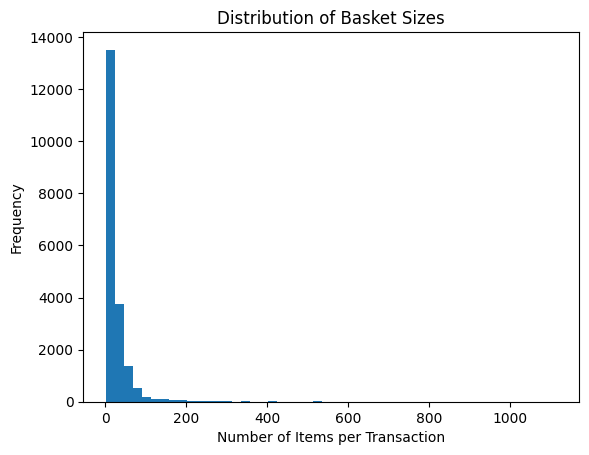

In [10]:
import matplotlib.pyplot as plt

plt.hist(basket_size, bins=50)
plt.title("Distribution of Basket Sizes")
plt.xlabel("Number of Items per Transaction")
plt.ylabel("Frequency")
plt.show()

The dataset contains 19960 unique transactions after cleaning. The average baseket size is about 26 items, while the median basket size is 15 items. indicating a right skewed distribution.

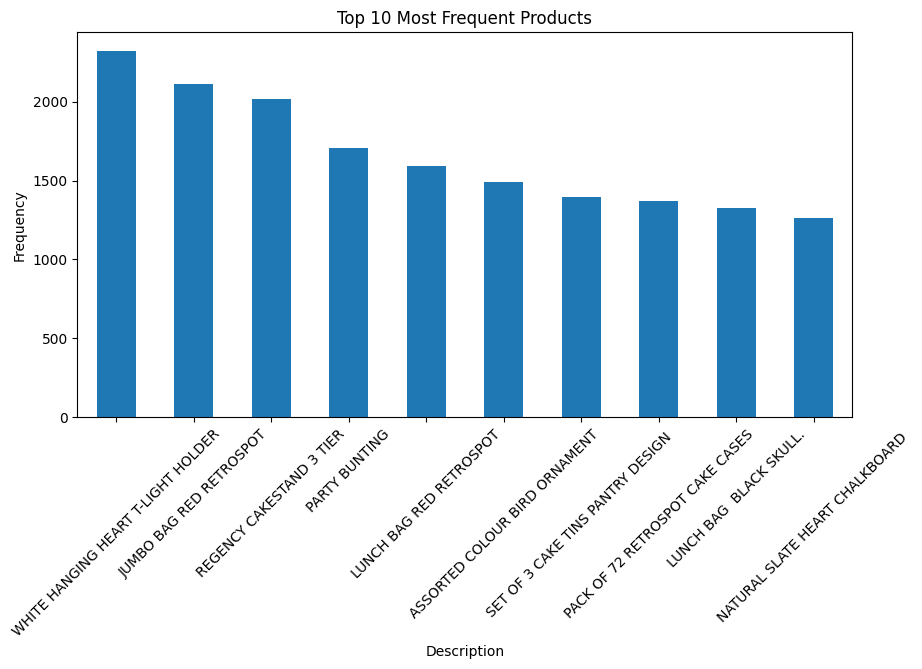

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2323
JUMBO BAG RED RETROSPOT,2112
REGENCY CAKESTAND 3 TIER,2017
PARTY BUNTING,1706
LUNCH BAG RED RETROSPOT,1594
ASSORTED COLOUR BIRD ORNAMENT,1489
SET OF 3 CAKE TINS PANTRY DESIGN,1399
PACK OF 72 RETROSPOT CAKE CASES,1370
LUNCH BAG BLACK SKULL.,1328


In [11]:
# Frequncy of top items

top_items = online_retail['Description'].value_counts().head(10)

top_items.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Most Frequent Products")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

top_items



The most frequent item appears over 2000 times, with “WHITE HANGING HEART T-LIGHT HOLDER” being the most common item. The frequency distribution shows that a small number of items are purchased often, while most items appear less often. This indicates a long-tail distribution typical of retail datasets. This concentration of high-frequency items may strongly influence mining results.


/tmp/ipython-input-1976044186.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = online_retail.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique()


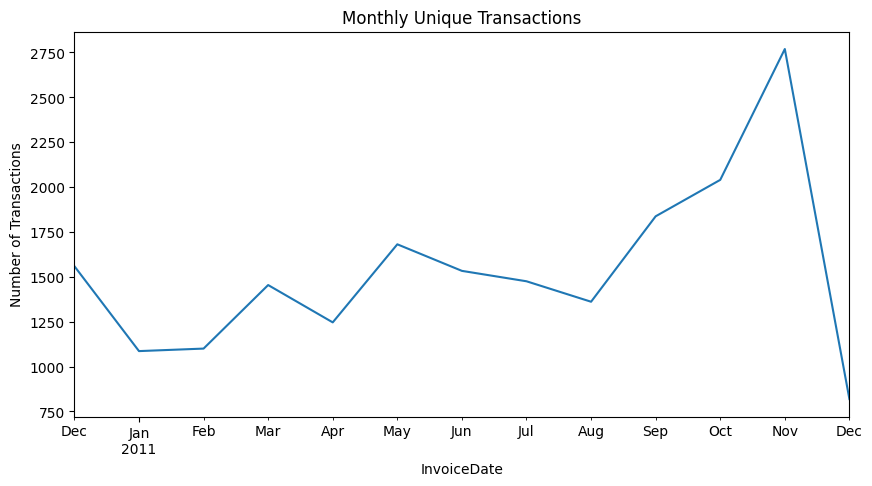

,InvoiceNo
InvoiceDate,
2010-12-31,1559
2011-01-31,1086
2011-02-28,1100
2011-03-31,1454
2011-04-30,1246
2011-05-31,1681
2011-06-30,1533
2011-07-31,1475
2011-08-31,1361


In [12]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

monthly_transactions = online_retail.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique()

monthly_transactions.plot(figsize=(10,5))
plt.title("Monthly Unique Transactions")
plt.ylabel("Number of Transactions")
plt.show()

monthly_transactions


The dataset spans from December 2010 to December 2011. Transaction volume increases toward the end of 2011, with a peak in November, implying seasonal purchasing likely related to a holiday. These temporal trends support the potential use of sequential pattern mining in later analysis.


# Initial Insights and Direction

Observations:


*   Basket sizes are right skewed, with a few large wholesale transactions.
*   Seasonal patterns exist, with a spike in november
*   Few numbers of items dominate transaction frequency, implying long tail distribution.


Hypothesis:
*   The shopping patterns change during busy months like November, and some items are more popular than others, so regular frequent itemset mining might cause a loss in some important item combinations. Considering the pattern over time may help with finding additional relationships.


Potential RQs:


*   How does changing the support threshold affect assocition rules?
*   Do the seasonal patterns affect which items are frequently bought together?






# Github Portfolio Building

A github repositor has been created for this project.